In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [26]:
df.shape

(200, 5)

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


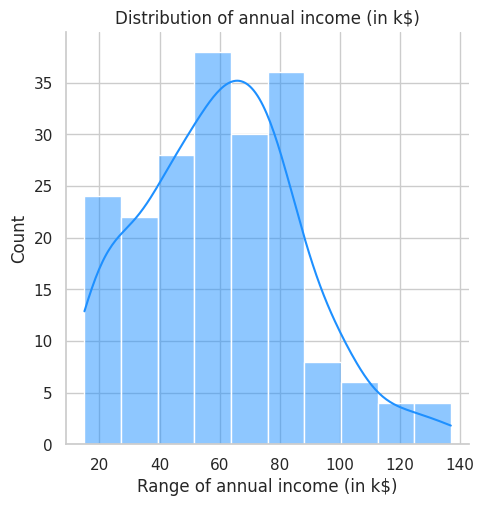

In [29]:
# Distribution de l'Annual Income
sns.set(style="whitegrid")
sns.displot(df["Annual Income (k$)"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()


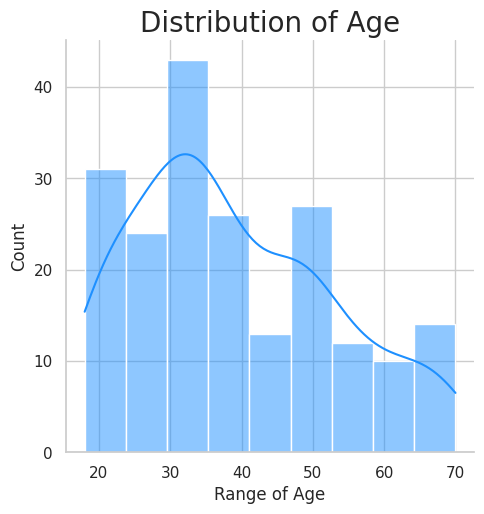

In [30]:
# distribution of age
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()

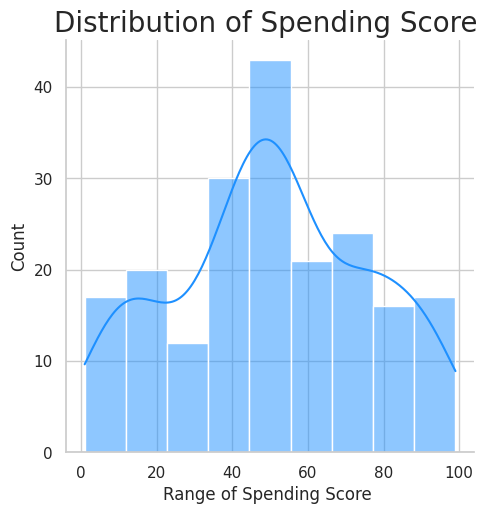

In [31]:
# distribution of age
sns.set(style="whitegrid")
sns.displot(df["Spending Score (1-100)"], kde=True, color="dodgerblue")

plt.title('Distribution of Spending Score ', fontsize = 20)
plt.xlabel('Range of Spending Score ')
plt.ylabel('Count')

plt.show()

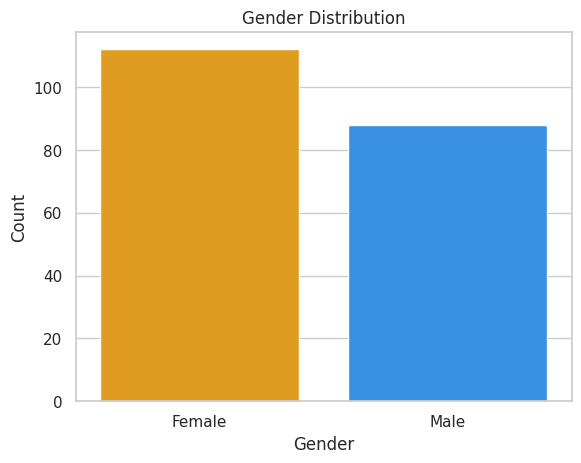

In [32]:
# Analyse du genre
genders = df["Gender"].value_counts()
colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}
palette = [colors[gender] for gender in genders.index]

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=palette)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()


In [33]:
# considering two features: annual income and spending score
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


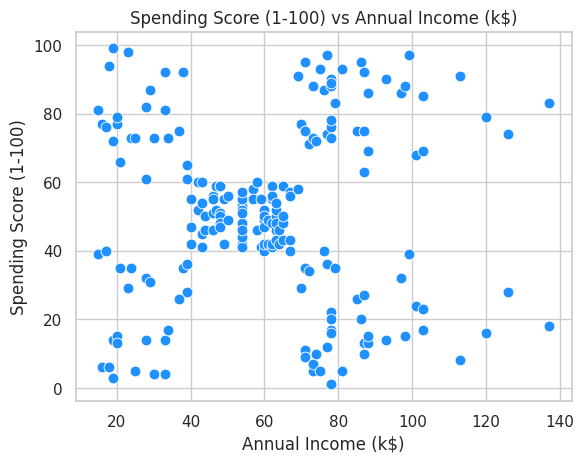

In [34]:
# scatterplot of the above data
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

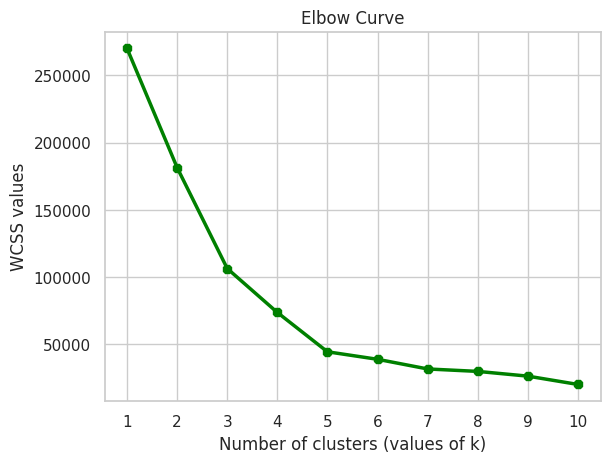

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="green", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()


For k = 2, the silhouette score is 0.2968969162503008
For k = 3, the silhouette score is 0.46761358158775435
For k = 4, the silhouette score is 0.4931963109249047
For k = 5, the silhouette score is 0.553931997444648
For k = 6, the silhouette score is 0.53976103063432
For k = 7, the silhouette score is 0.5264283703685728
For k = 8, the silhouette score is 0.45827056882053113
For k = 9, the silhouette score is 0.4553729779390266
For k = 10, the silhouette score is 0.45925273534781125


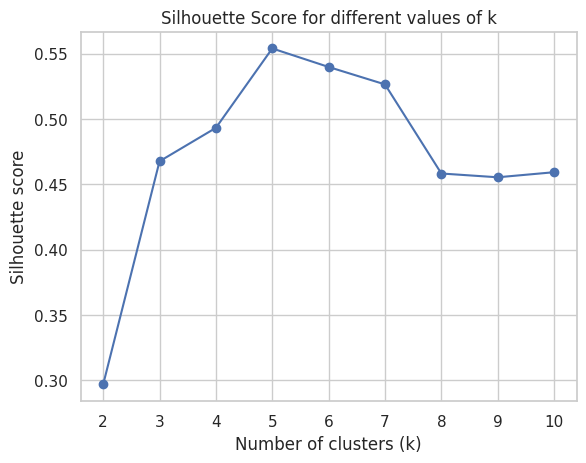

In [36]:
#Silhouette Score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Liste pour stocker les valeurs de silhouette
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calcul de la silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For k = {k}, the silhouette score is {silhouette_avg}")

# Tracé de la silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for different values of k')
plt.show()


k=5 semble avoir le meilleur score de silhouette (0.554), indiquant une bonne séparation des clusters

In [37]:
# taking k = 5
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


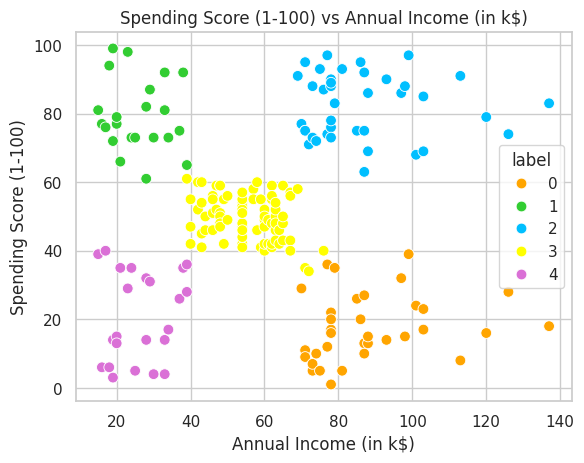

In [38]:
colors = ["orange", "limegreen", "deepskyblue", "yellow", "orchid"]
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()


In [39]:
# Exemple de code pour afficher les clients dans chaque groupe de cluster

# Groupe 1
cust1 = df[df["label"] == 1]
print('Nombre de clients dans le 1er groupe :', len(cust1))
print('Ils sont :', cust1["CustomerID"].values)
print("--------------------------------------------")

# Groupe 2
cust2 = df[df["label"] == 2]
print('Nombre de clients dans le 2ème groupe :', len(cust2))
print('Ils sont :', cust2["CustomerID"].values)
print("--------------------------------------------")

# Groupe 3
cust3 = df[df["label"] == 0]
print('Nombre de clients dans le 3ème groupe :', len(cust3))
print('Ils sont :', cust3["CustomerID"].values)
print("--------------------------------------------")

# Groupe 4
cust4 = df[df["label"] == 3]
print('Nombre de clients dans le 4ème groupe :', len(cust4))
print('Ils sont :', cust4["CustomerID"].values)
print("--------------------------------------------")

# Groupe 5
cust5 = df[df["label"] == 4]
print('Nombre de clients dans le 5ème groupe :', len(cust5))
print('Ils sont :', cust5["CustomerID"].values)
print("--------------------------------------------")


Nombre de clients dans le 1er groupe : 22
Ils sont : [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Nombre de clients dans le 2ème groupe : 39
Ils sont : [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Nombre de clients dans le 3ème groupe : 35
Ils sont : [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Nombre de clients dans le 4ème groupe : 81
Ils sont : [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114